# Imports

In [0]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA

#Create DataFrame

In [0]:
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2019-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2020-01-11&revision_date=2020-01-11&nd=1948-01-01')

In [0]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 2 columns):
DATE      864 non-null datetime64[ns]
UNRATE    864 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.6 KB


In [0]:
# df.set_index('DATE', inplace = True)

# Explore Data Visually

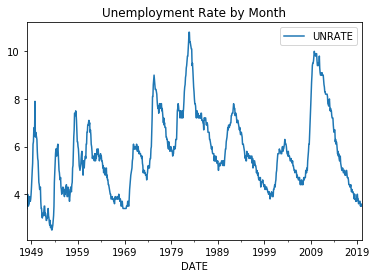

In [0]:
df.set_index('DATE').plot(title = 'Unemployment Rate by Month')


#Check for Stationarity

In [0]:
adf_test = sm.tsa.stattools.adfuller(df['UNRATE'])
results = pd.Series(adf_test[0:4], index=['ADF Test Statistic', 'P-Value','# Lags Used', '# Observations Used'])

for key, value in adf_test[4].items():
    results['Critical Value (%s)'%key]=value

print('Augmented Dickey-Fuller Test Results: \n')
print(results)


Augmented Dickey-Fuller Test Results: 

ADF Test Statistic       -2.877228
P-Value                   0.048061
# Lags Used              12.000000
# Observations Used     850.000000
Critical Value (1%)      -3.438067
Critical Value (5%)      -2.864946
Critical Value (10%)     -2.568584
dtype: float64


# Make Data Stationary

In [0]:
df['diff'] = df['UNRATE'].diff()
df['diff'] = df['UNRATE'] - df['UNRATE'].shift(1)
df = df.iloc[1:]

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,UNRATE,diff
2,1948-03-01,4.0,0.2
3,1948-04-01,3.9,-0.1
4,1948-05-01,3.5,-0.4
5,1948-06-01,3.6,0.1
6,1948-07-01,3.6,0.0
...,...,...,...
859,2019-08-01,3.7,0.0
860,2019-09-01,3.5,-0.2
861,2019-10-01,3.6,0.1
862,2019-11-01,3.5,-0.1


In [0]:
adf_test = sm.tsa.stattools.adfuller(df['diff'])
results = pd.Series(adf_test[0:4], index=['ADF Test Statistic', 'P-Value','# Lags Used', '# Observations Used'])

for key, value in adf_test[4].items():
    results['Critical Value (%s)'%key]=value

print('Augmented Dickey-Fuller Test Results: \n')
print(results)


Augmented Dickey-Fuller Test Results: 

ADF Test Statistic     -8.801630e+00
P-Value                 2.104628e-14
# Lags Used             1.100000e+01
# Observations Used     8.500000e+02
Critical Value (1%)    -3.438067e+00
Critical Value (5%)    -2.864946e+00
Critical Value (10%)   -2.568584e+00
dtype: float64


Results indicate that the data is now stationary.

# View Visually

In [0]:
df['rolling_mean'] = df['UNRATE'].rolling(window = 12).mean()
df['rolling_std'] = df['UNRATE'].rolling(window = 12).std()

rolling = pd.melt(df, id_vars = 'DATE', 
                  value_vars = ['UNRATE', 'rolling_mean', 'rolling_std', 'diff'], 
                  var_name = 'Variable', value_name = 'Value')

px.line(rolling, x = 'DATE', y = 'Value', color = 'Variable')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# ACF

Text(0.5, 1.0, 'PACF Unemployment Rate')

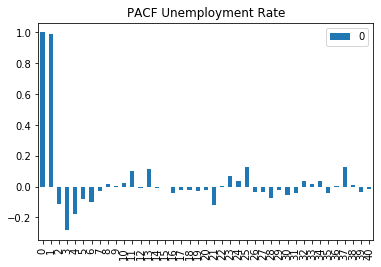

In [0]:
x_acf = pd.DataFrame(pacf(df['UNRATE']))
x_acf.plot(kind='bar')
plt.title("PACF Unemployment Rate")

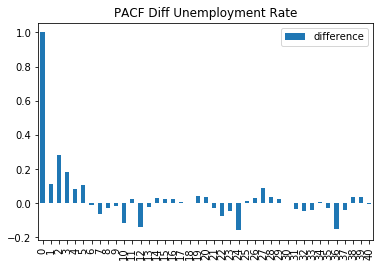

In [0]:
x_acf = pd.DataFrame(pacf(df['diff'][1:]))
x_acf.plot(kind='bar')
plt.title("PACF Diff Unemployment Rate")
plt.legend(['difference'])

# ARIMA

In [0]:
model = ARIMA(df['UNRATE'], order = (0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  861
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 132.111
Method:                           css   S.D. of innovations              0.208
Date:                Sun, 12 Jan 2020   AIC                           -260.222
Time:                        15:57:07   BIC                           -250.706
Sample:                             1   HQIC                          -256.579
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.007     -0.082      0.935      -0.014       0.013
Residuals Description
count    8.610000e+02
mean     3.127456e-09
std      2.076718e-01
min     -1.499419e+00
25%     -9.941928e-02

Text(0.5, 1.0, 'Histogram of Residuals')

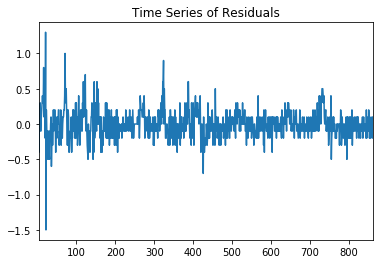

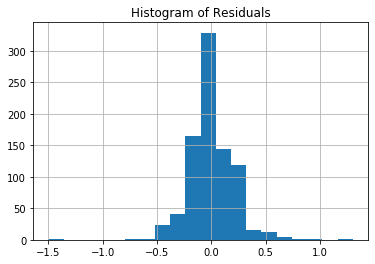

In [0]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [0]:
model_fit.aic

-260.22185043870604

In [0]:
model = ARIMA(df['UNRATE'], order = (1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  862
Model:                     ARMA(1, 0)   Log Likelihood                 131.838
Method:                       css-mle   S.D. of innovations              0.207
Date:                Sun, 12 Jan 2020   AIC                           -257.676
Time:                        15:57:08   BIC                           -243.398
Sample:                             0   HQIC                          -252.211
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2748      0.838      6.297      0.000       3.633       6.917
ar.L1.UNRATE     0.9924      0.004    250.703      0.000       0.985       1.000
                                    Roots   

Text(0.5, 1.0, 'Histogram of Residuals')

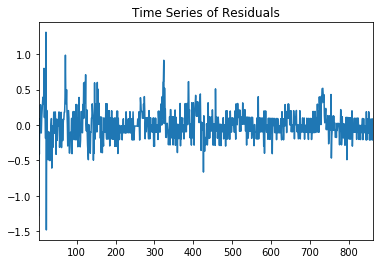

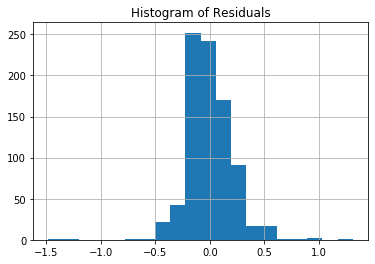

In [0]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [0]:
model_fit.aic

-257.67599477618205

In [0]:
model = ARIMA(df['UNRATE'], order = (1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  862
Model:                     ARMA(1, 1)   Log Likelihood                 135.668
Method:                       css-mle   S.D. of innovations              0.206
Date:                Sun, 12 Jan 2020   AIC                           -263.335
Time:                        15:57:09   BIC                           -244.298
Sample:                             0   HQIC                          -256.048
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3246      0.788      6.761      0.000       3.781       6.868
ar.L1.UNRATE     0.9913      0.004    229.636      0.000       0.983       1.000
ma.L1.UNRATE     0.0768      0.028      2.75

Text(0.5, 1.0, 'Histogram of Residuals')

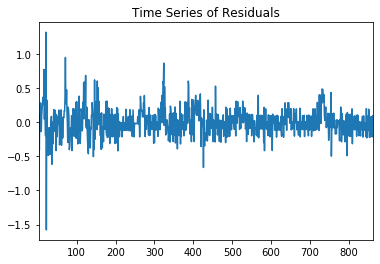

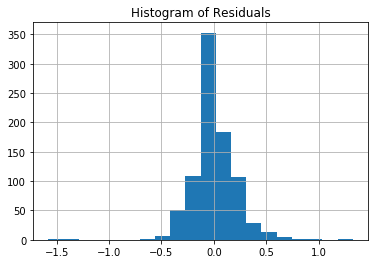

In [0]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [0]:
model_fit.aic

-263.33549257596405

In [0]:
model = ARIMA(df['UNRATE'], order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  861
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 172.530
Method:                       css-mle   S.D. of innovations              0.198
Date:                Sun, 12 Jan 2020   AIC                           -337.061
Time:                        15:57:09   BIC                           -318.028
Sample:                             1   HQIC                          -329.775
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0010      0.015     -0.068      0.946      -0.030       0.028
ar.L1.D.UNRATE     0.8696      0.029     29.772      0.000       0.812       0.927
ma.L1.D.UNRATE    -0.7151      0.037

Text(0.5, 1.0, 'Histogram of Residuals')

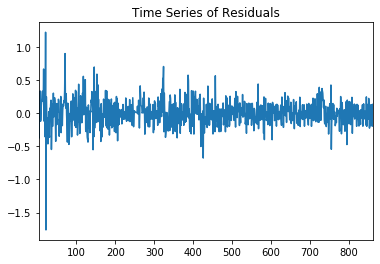

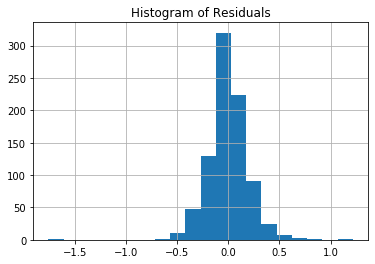

In [0]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [0]:
model_fit.aic

-337.06082661310893